### A Jupyter notebook for easy calculations of molecular electrostatics with PB

In this notebook we want to showcase the power of Jupyter for easy and interactive molecular electrostatics calculations. Just as an example, we will use the PBJ library.

In [1]:
import pbj

Let's start by generating a simulation and loading the structure of ubiquitin (PDB ID: 1ubq).

In [2]:
simulation = pbj.Simulation()
ubq = pbj.electrostatics.Solute('1ubq.pqr')
simulation.add_solute(ubq)



 <<INFO>> Starting NanoShaper 0.7.8
 <<INFO>> Loading atoms....
 <<INFO>> Read 1231 atoms
 <<INFO>> Geometric baricenter ->  30.5399 29.4191 17.9425
 <<INFO>> Grid is 49
 <<INFO>> MAX 52.3581 51.2373 39.7607
 <<INFO>> MIN 8.72172 7.60092 -3.87568
 <<INFO>> Perfil 90 %
 <<INFO>> Rmaxdim 39.9394
 <<INFO>> Allocating memory...ok!
 <<INFO>> Initialization completed
 <<INFO>> Adjusting self intersection grid 
 <<INFO>> Self intersection grid is (before) 28
 <<INFO>> Self intersection grid is 16
 <<INFO>> Allocating self intersection grid....ok!
 <<INFO>> Computing alpha shape complex....ok!
 <<INFO>> Checking 172 probes for self intersections...ok!
 <<INFO>> Surface build-up time.. 0 [s]
 <<INFO>> Probe Radius value 1.4
 <<INFO>> Number of ses cells -> 3167
 <<INFO>> Number of del_point cells -> 504
 <<INFO>> Number of regular del_edge cells -> 1558
 <<INFO>> Number of singular del_edge cells -> 1
 <<INFO>> Number of regular del_facet cells -> 1016
 <<INFO>> Number of singular del_facet c

Now we have all we need to do our calculations. Let's say I want to compute the polar component of the solvation free energy

In [3]:
simulation.calculate_solvation_energy()

/home/chris/miniconda3/envs/pbj/lib/python3.9/site-packages/pyopencl/__init__.py:270: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


which we can query directly

In [6]:
solvation_energy = simulation.solutes[0].results["solvation_energy"]
print("The polar component of the solvation energy is %1.4f kcal/mol"%solvation_energy)

The polar component of the solvation energy is -295.7744 kcal/mol


Let's say now I want to visualize the electrostatic potential in the solvent, on a plane that cuts through the middle of the molecule. We'll first generate a plane with `numpy` and compute. 

In [7]:
import numpy

In [23]:
x_min = numpy.min(simulation.solutes[0].x_q[:,0])
x_max = numpy.max(simulation.solutes[0].x_q[:,0])
y_min = numpy.min(simulation.solutes[0].x_q[:,1])
y_max = numpy.max(simulation.solutes[0].x_q[:,1])
z_center = numpy.average(simulation.solutes[0].x_q[2,:])

margin = 5

x = numpy.linspace(x_min-margin, x_max+margin, num=150)
y = numpy.linspace(y_min-margin, y_max+margin, num=150)

X,Y,Z = numpy.meshgrid(x,y,z_center)

eval_points = numpy.vstack((X.ravel(),Y.ravel(),Z.ravel())) # plane with evaluation points

phi_solvent = simulation.calculate_potential_solvent(eval_points) # compute!

to_mV_units = 180951
phi_2D = numpy.reshape(phi_solvent,(len(x),len(y)))*to_mV_units # rearrange into a grid

/home/chris/miniconda3/envs/pbj/lib/python3.9/site-packages/pyopencl/__init__.py:270: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


Now we have quantitatively access to the electrostatic potential for our analysis. We might be interested in printing

In [18]:
print(phi_2D)

[[-0.86231701 -0.94584215 -1.03601535 ... -2.22800593 -2.11156419
  -2.00045312]
 [-0.88446401 -0.97293782 -1.0687695  ... -2.34168606 -2.21686933
  -2.09799986]
 [-0.90409875 -0.99756606 -1.09915253 ... -2.45895513 -2.32531048
  -2.1982859 ]
 ...
 [ 2.77817271  2.938654    3.10715567 ... -0.47294284 -0.47664154
  -0.47797863]
 [ 2.64277297  2.79222389  2.94880546 ... -0.43887858 -0.44313908
  -0.44517   ]
 [ 2.51151717  2.65051348  2.79583011 ... -0.40700942 -0.41172542
  -0.41434046]]


or plotting with `matplotlib`

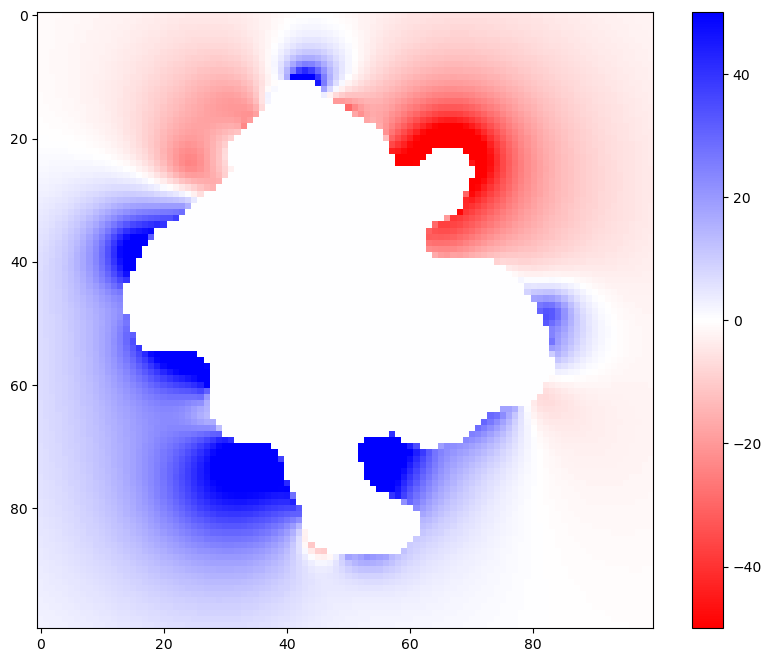

In [19]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(10,8))
plt.imshow(phi_2D, cmap='bwr_r',vmin=-50,vmax=50)
plt.colorbar()
plt.show()

One interesting application is computing the effective near potential ($\phi_{ENS}$), that can be measured with NMR spectroscopy:

In [20]:
simulation.calculate_potential_ens()
phi_ens = simulation.solutes[0].results["phi_ens"]

which we can explore numerically, or directly plot

[ -0.37965814   0.32422446  -0.39812581   3.24119      4.22760535
   7.8968803    6.48232026   6.74249748   4.97023104   6.94426534
   4.64987501   7.16681307   4.82315685   4.97803339   0.38882744
  -3.30064719  -3.71682582  -7.25022509  -5.56824636  -7.47532763
 -11.61296209  -7.03512533  -9.04635784 -11.31910197  -9.48094594
  -8.27998763 -10.7496312   -9.9859444   -7.15848041  -7.55909159
  -9.31343445  -6.65731097  -5.60584865  -7.118064    -4.32492295
  -4.66553112  -2.07948011  -1.15007696   5.27922358   4.27455279
   9.58485578   8.52370878   9.72042404  12.26536183   8.92330133
   7.36246913   4.81138655  -0.53860617  -4.51679467  -6.76890051
  -4.84638791  -5.34356934  -5.47437089  -4.36578611  -4.65946179
  -2.23159366  -1.98382134  -0.09427547   1.44944292   4.27321266
   1.321298     1.89396254   5.78944605   6.25879472  10.74582458
   9.71348272   9.41213646   7.38569719   4.79274175   4.30312652
   0.44939724   1.29376528  -2.7011518 ]


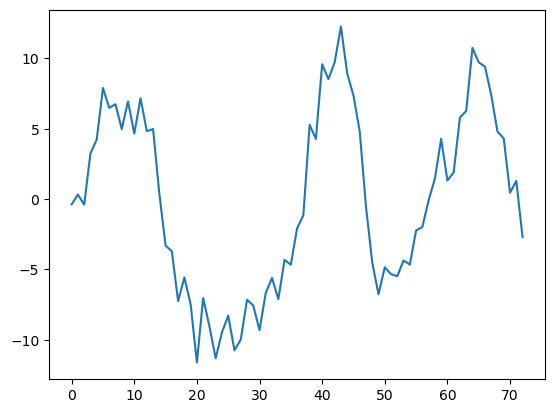

In [22]:
print(phi_ens)
plt.plot(phi_ens)

which can be compared with the experimental results in Fig. 3b of [Yu, Pletcka, Pettitt, Iwahara. PNAS (2021)](https://www.pnas.org/doi/epdf/10.1073/pnas.2104020118).